# 1. Lý thuyết

**1) Để khởi tạo model trong tensorflow chúng ta sử dụng class nào?**

A. Sequential hoặc Model

B. Dense

C. Adam

D. Variable

Đáp án: A

**2) Điểm khác biệt giữa fit và fit_generator trong tensorflow là gì ?**

A. fit sẽ yêu cầu load toàn bộ dữ liệu lên RAM trong khi fit_generator sẽ sử dụng một hàm generator để sinh dữ liệu tại mỗi mini-batch. Từ đó giúp tiết kiệm bộ nhớ.

B. fit sẽ sử dụng hàm generator để sinh dữ liệu tại thời điểm huấn luyện còn fit_generator sẽ load toàn bộ dữ liệu.

C. fit sẽ huấn luyện model theo mini-batch còn fit_generator thì huấn luyện trên toàn bộ dataset.

D. trong hàm fit chúng ta có thể khai báo tập validation dataset còn trong fit_generator thì không.

Đáp án: A

**3) Các modules chính trong tensorflow dùng để xây dựng và huấn luyện model.**

A. `tf.keras.layers`: khởi tạo activation function; `tf.keras.Sequential`: khởi tạo model; `tf.keras.activations`: để khởi tạo các layers; `tf.keras.optimizers`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.losses`: khởi tạo loss function; `tf.keras.preprocessing`: Preprocessing data.

B. `tf.keras.layers`: để khởi tạo các layers; `tf.keras.Sequential`: khởi tạo model; `tf.keras.activations`: khởi tạo activation function; `tf.keras.optimizers`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.losses`: khởi tạo loss function; `tf.keras.preprocessing`: Preprocessing data.

C. `tf.keras.layers`: để khởi tạo các layers; `tf.keras.Sequential`: Preprocessing data; `tf.keras.activations`: khởi tạo activation function; `tf.keras.optimizers`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.losses`: khởi tạo loss function; `tf.keras.preprocessing`: khởi tạo model

D. `tf.keras.layers`: để khởi tạo các layers; `tf.keras.Sequential`: khởi tạo model; `tf.keras.activations`: khởi tạo activation function; `tf.keras.optimizers`: khởi tạo loss function; `tf.keras.losses`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.preprocessing`: Preprocessing data.

Đáp án: B

**4) Các bước trong huấn luyện model bao gồm:**

A. 1. Train/test data split --> 2. Initialize the optimizer algorithm --> 3. Build up model architecture --> 4. Train model on train --> 5. Evaluation on test --> 6. Save and use trained model

B. 1. Train/test data split --> 2. Build up model architecture --> 3. Train model on train --> 4. Initialize the optimizer algorithm --> 5. Evaluation on test --> 6. Save and use trained model

C. 1. Train/test data split --> 2. Build up model architecture --> 3. Initialize the optimizer algorithm --> 4. Evaluation on test --> 5. Train model on train --> 6. Save and use trained model

D. 1. Train/test data split --> 2. Build up model architecture --> 3. Initialize the optimizer algorithm --> 4. Train model on train --> 5. Evaluation on test --> 6. Save and use trained model

Đáp án: D

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

Đáp án: C

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3


In [1]:
#6
import tensorflow as tf
a=tf.random.uniform(shape=[32,32,3],dtype=tf.float32)


7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.


In [ ]:
#7
R=a[:,:,0]
G=a[:,:,1]
B=a[:,:,2]


8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

In [ ]:
#8 
# hadamard
hadamard= tf.multiply(R,G)
# normal
normal= tf.matmul(R, G)

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/c/ml-hands-on-python-kaggle-01) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20.

In [2]:
#9
from google.colab import drive
import os
drive.mount("/content/gdrive")
os.chdir('gdrive/My Drive/Colab Notebooks/DeepLearning2/2.Tensorflow')
!ls

Mounted at /content/gdrive
'05a - Deep Neural Networks (TensorFlow).ipynb'
'05b - Convolutional Neural Networks (Tensorflow).ipynb'
'05c - Transfer Learning (Tensorflow).ipynb'
 2.Tensorflow.gslides
 2.TensorflowHomeWork_Correct.ipynb
 2.TensorflowHomeWork.ipynb
 keras_cheatsheet.pdf
 models
 TensorflowLayer.gsheet


In [3]:
import numpy as np
import random
def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
seed = 42 
seed_all(seed)

In [4]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [5]:
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

In [6]:
df_all = pd.read_csv('../data/income_classification/train.csv')

In [7]:
# normalize string
def str_normalize(s):
    # convert into lowercase and replace multiple spaces into single space
    s = str(s).strip().lower()
    s = re.sub(' +', " ", s)
    return s
# Encode category and object columns 
def process(df):        
  for col in df.columns:
      if df[col].dtype.name == "object" or df[col].dtype.name == "category":
          df[col] = df[col].apply(str_normalize).astype("category")
  return df
df_all = process(df_all.copy())
IDs=df_all.pop('ID')
label = df_all.pop('target_income')
df_all_one_hot = pd.get_dummies(df_all)

In [8]:
features = df_all_one_hot.columns.tolist()
label = label.values

In [ ]:
# features

In [10]:
features = df_all_one_hot.columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(df_all_one_hot[features].values, # input variable
                                                    label, # output variable
                                                    test_size=0.2, # test dataset proportion
                                                    # stratify=df_all['target_income'], # assign equal proportion of target label in train/test 
                                                    random_state=0) # keep train/test split the same if run again. 
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Set: 20000, Test Set: 5000 



In [ ]:
# !pip freeze | grep tensorflow
# !pip install --upgrade tensorflow

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.7.0
TensorFlow version: 2.7.0


# Tìm kiếm learning rate

Learning rate là một trong những siêu tham số quan trọng ảnh hưởng trực tiếp tới tốc độ huấn luyện và khả năng hội tụ của model. Việc lựa chọn learning rate rất quan trọng nhưng thường được bỏ qua trong quá trình huấn luyện model. Phần này nhằm giới thiệu tới bạn một phương pháp đơn giản nhưng thường được lựa chọn khi tìm kiếm learning rate cho huấn luyện.

**Các TH của learning rate**
Tăng dần learning rate theo batch iteration và đo lường hàm loss function trên từng batch. Những vị trí learning rate nhỏ sẽ khiến cho hàm loss function nằm ngang, khi learning rate phù hợp thì loss function giảm dần, và khi learning rate function tăng cao sẽ khiến cho hàm loss function tăng và dao động ngẫu nhiên như hình 1:
![](https://imgur.com/pWz4X6b.png)

**Learning rate phù hợp**
Khi đó chúng ta sẽ lựa chọn learning rate là điểm màu đỏ nằm giữa đường hạ dốc của loss function như hình 2:
![](https://imgur.com/9uuNdp0.png)

In [12]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

def _init_model(hl = 10):
  model = Sequential()
  model.add(Dense(hl, input_dim=len(features), activation='relu'))
  model.add(Dense(hl, input_dim=hl, activation='relu'))
  model.add(Dense(6, input_dim=hl, activation='relu'))
  model.add(Dense(1, input_dim=6, activation='sigmoid'))
  print(model.summary())
  return model

model = _init_model(hl=hl)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1090      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,273
Trainable params: 1,273
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
class LRFind(tf.keras.callbacks.Callback): 
    def __init__(self, min_lr, max_lr, n_rounds): 
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.step_up = (max_lr / min_lr) ** (1 / n_rounds)
        self.lrs = []
        self.losses = []
     
    def on_train_begin(self, logs=None):
        self.weights = self.model.get_weights()
        self.model.optimizer.lr = self.min_lr

    def on_train_batch_end(self, batch, logs=None):
        self.lrs.append(self.model.optimizer.lr.numpy())
        self.losses.append(logs["loss"])
        self.model.optimizer.lr = self.model.optimizer.lr * self.step_up
        if self.model.optimizer.lr > self.max_lr:
            self.model.stop_training = True
        
    def on_train_end(self, logs=None):
        self.model.set_weights(self.weights)

In [14]:
# Define a classifier network
model = _init_model(hl=hl)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                1090      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 6)                 66        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,273
Trainable params: 1,273
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
opt = optimizers.Adam()

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

400/400 [==============================] - 2s 4ms/step - loss: 0.6635 - accuracy: 0.5311 - val_loss: 0.8077 - val_accuracy: 0.7622


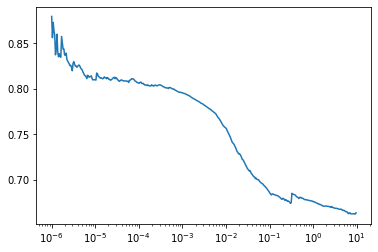

In [16]:
import matplotlib.pyplot as plt

EPOCHS = 1
BATCH_SIZE = 16
lr_finder_steps = 400
lr_find = LRFind(1e-6, 1e1, lr_finder_steps)

history = model.fit(x_train, y_train,
                    steps_per_epoch=lr_finder_steps,
                    epochs=EPOCHS, batch_size=BATCH_SIZE, 
                    validation_data=(x_test, y_test), 
                    callbacks=[lr_find])

plt.plot(lr_find.lrs, lr_find.losses)
plt.xscale('log')
plt.show()

Chọn `learning_rate` nằm ở giữa phần xuống dốc nằm giữa [1e-3, 1e-1]. Như vậy learning_rate phù hợp là 1e-2. 

# Huấn luyện ngẫu nhiên

In [17]:
# Define a classifier network
model = _init_model(hl=hl)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                1090      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,273
Trainable params: 1,273
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#hyper-parameters for optimizer
learning_rate = 0.01
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=16, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3535 - accuracy: 0.8343 - val_loss: 0.3173 - val_accuracy: 0.8460
Epoch 2/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3243 - accuracy: 0.8482 - val_loss: 0.3239 - val_accuracy: 0.8514
Epoch 3/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3181 - accuracy: 0.8521 - val_loss: 0.3164 - val_accuracy: 0.8536
Epoch 4/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3136 - accuracy: 0.8540 - val_loss: 0.3135 - val_accuracy: 0.8546
Epoch 5/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3105 - accuracy: 0.8565 - val_loss: 0.3186 - val_accuracy: 0.8524
Epoch 6/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3078 - accuracy: 0.8565 - val_loss: 0.3129 - val_accuracy: 0.8528
Epoch 7/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3063 - accuracy: 0.8571 - val_loss: 0.3115 - val_accuracy:

# Đánh giá model

Evaluation on test dataset
ACCURACY_SCORE:  0.8532
F1_SCORE:  0.7828
CONFUSION_MATRIX:
 [[3556  255]
 [ 479  710]] 

              precision    recall  f1-score   support

           0     0.8813    0.9331    0.9064      3811
           1     0.7358    0.5971    0.6592      1189

    accuracy                         0.8532      5000
   macro avg     0.8085    0.7651    0.7828      5000
weighted avg     0.8467    0.8532    0.8477      5000
 



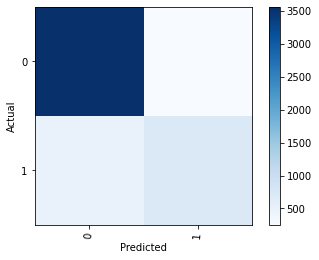

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline



def _evaluate(model, x_test):
  y_pred = model.predict(x_test)
  predictions = (y_pred > 0.5)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions)
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, x_test)

# Thay activation function

In [20]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

def _init_model(hl = 10):
  model = Sequential()
  model.add(Dense(hl, input_dim=len(features), activation='sigmoid'))
  model.add(Dense(hl, input_dim=hl, activation='sigmoid'))
  model.add(Dense(6, input_dim=hl, activation='sigmoid'))
  model.add(Dense(1, input_dim=6, activation='sigmoid'))
  print(model.summary())
  return model

model = _init_model(hl=hl)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                1090      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 6)                 66        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,273
Trainable params: 1,273
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
#hyper-parameters for optimizer
learning_rate = 0.01
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=16, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3734 - accuracy: 0.8302 - val_loss: 0.3243 - val_accuracy: 0.8526
Epoch 2/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3307 - accuracy: 0.8498 - val_loss: 0.3238 - val_accuracy: 0.8472
Epoch 3/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3207 - accuracy: 0.8521 - val_loss: 0.3218 - val_accuracy: 0.8540
Epoch 4/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.8540 - val_loss: 0.3249 - val_accuracy: 0.8454
Epoch 5/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3107 - accuracy: 0.8567 - val_loss: 0.3196 - val_accuracy: 0.8498
Epoch 6/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3070 - accuracy: 0.8583 - val_loss: 0.3241 - val_accuracy: 0.8486
Epoch 7/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.8580 - val_loss: 0.3170 - val_accuracy:

Evaluation on test dataset
ACCURACY_SCORE:  0.8504
F1_SCORE:  0.788
CONFUSION_MATRIX:
 [[3482  329]
 [ 419  770]] 

              precision    recall  f1-score   support

           0     0.8926    0.9137    0.9030      3811
           1     0.7006    0.6476    0.6731      1189

    accuracy                         0.8504      5000
   macro avg     0.7966    0.7806    0.7880      5000
weighted avg     0.8469    0.8504    0.8483      5000
 



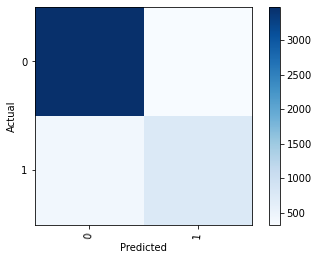

In [ ]:
_evaluate(model, x_test)

Nhận xét: Khi sử dụng hàm activation function là hàm `sigmoid` có thể khiến cho accuracy tăng lên một chút so với `relu` nhưng gây tốn kém hơn về mặt chi phí tính toán. 